#### Visualization of Dataset Statistics

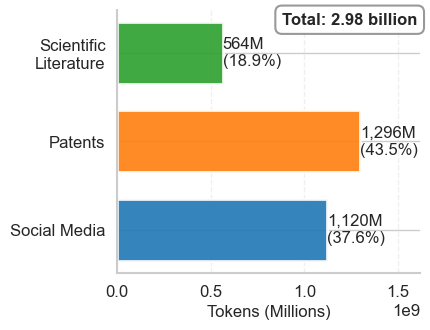

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from matplotlib.patches import FancyBboxPatch
import numpy as np

# Set seaborn style and context
sns.set_theme(style="whitegrid", context="notebook", font_scale=1.1)

# Set style for academic publications - optimized for small scale
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
# plt.rcParams['font.size'] = 11  # Increased from 9 for better readability at small scale
plt.rcParams['axes.linewidth'] = 1.5  # Thicker for visibility

# Data
datasets = ['Social Media', 'Patents', 'Scientific\nLiterature']
datasets_compact = ['Social\nMedia', 'Patents', 'Scientific\nLit.']
samples = [22032043, 49023, 37440]
tokens = [1119741929, 1296038665, 564283137]
avg_tokens = [50.82, 26437.36, 15071.66]

# # Convert samples into thousands for better label formatting
# samples = [s / 1e3 for s in samples]  # in thousands

# # Color palette - original
# colors = ['#F18F01', '#A23B72', '#2E86AB']

# Get seaborn's default color palette
colors = sns.color_palette("tab10", 3)

# ============================================================================
# PLOT 1: Token Distribution (Horizontal Bars)
# ============================================================================
fig1, ax1 = plt.subplots(figsize=(4.5, 3.5))

y_pos = np.arange(len(datasets))
bars = ax1.barh(y_pos, tokens, color=colors, alpha=0.9, height=0.7,
                edgecolor='white', linewidth=2)

# Add value labels - larger and bolder
for i, (bar, val) in enumerate(zip(bars, tokens)):
    width = bar.get_width()
    percentage = (val / sum(tokens)) * 100
    ax1.text(width + 25, bar.get_y() + bar.get_height()/2,
             f'{val/1e6:,.0f}M\n({percentage:.1f}%)',
             va='center', ha='left', fontsize=12,

             # fontweight='bold'
             )

ax1.set_yticks(y_pos)
ax1.set_yticklabels(datasets, fontsize=12,
                    # fontweight='bold'
                    )
ax1.set_xlabel('Tokens (Millions)', fontsize=12,
               # fontweight='bold'
               )
# ax1.set_title('(a) Token Distribution', fontsize=12, fontweight='bold', pad=12, loc='left')
ax1.set_title('', fontsize=12,
              # fontweight='bold',
              pad=12, loc='left')

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['left'].set_linewidth(1.5)
ax1.spines['bottom'].set_linewidth(1.5)

ax1.grid(axis='x', alpha=0.3, linestyle='--', linewidth=1)
ax1.set_axisbelow(True)
ax1.set_xlim(0, max(tokens) * 1.25)
ax1.tick_params(width=1.5, length=5, labelsize=12)

# Add total document count annotation
total_tokens = sum(tokens)


ax1.text(0.99, 0.99, f'Total: {total_tokens/1e9:.2f} billion',
         transform=ax1.transAxes, ha='right', va='top',
         fontsize=12,
         fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                   edgecolor='gray', alpha=0.8, linewidth=1.5))


plt.tight_layout()
plt.savefig('token_distribution.pdf', bbox_inches='tight',
            # facecolor='white'
            )
plt.show()
plt.close()


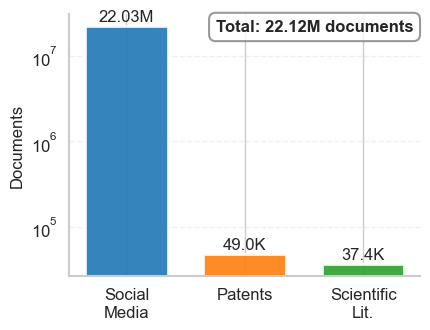

In [89]:
# ============================================================================
# PLOT 2: Document Count (Log Scale) - WITH TOTAL COUNT
# ============================================================================
fig2, ax2 = plt.subplots(figsize=(4.5, 3.5))

bars2 = ax2.bar(range(len(datasets_compact)), samples, color=colors, alpha=0.9,
                edgecolor='white', linewidth=2, width=0.7)

ax2.set_yscale('log')
ax2.set_xticks(range(len(datasets_compact)))
ax2.set_xticklabels(datasets_compact, fontsize=12,
                    # fontweight='bold'
                    )
ax2.set_ylabel('Documents', fontsize=12,
               # fontweight='bold'
               )
# ax2.set_title('(b) Document Count', fontsize=12, fontweight='bold', pad=12, loc='left')
ax2.set_title('', fontsize=12,
              # fontweight='bold',
              pad=12, loc='left')

# Add value labels with document count
for i, (bar, val) in enumerate(zip(bars2, samples)):
    height = bar.get_height()
    if val >= 1e6:
        label = f'{val/1e6:.2f}M'
    elif val >= 1e3:
        label = f'{val/1e3:.1f}K'
    else:
        label = f'{val:,.0f}'
    ax2.text(bar.get_x() + bar.get_width()/2, height * 1.05,
             label, ha='center', va='bottom', fontsize=12,
             # fontweight='bold'
             )

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_linewidth(1.5)
ax2.spines['bottom'].set_linewidth(1.5)
ax2.grid(axis='y', alpha=0.3, linestyle='--', linewidth=1)
ax2.set_axisbelow(True)
ax2.tick_params(width=1.5, length=5, labelsize=12)

# Add total document count annotation
total_docs = sum(samples)
ax2.text(0.98, 0.98, f'Total: {total_docs/1e6:.2f}M documents',
         transform=ax2.transAxes, ha='right', va='top',
         fontsize=12,
         fontweight='bold',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='white',
                   edgecolor='gray', alpha=0.8, linewidth=1.5))

plt.tight_layout()
plt.savefig('document_count.pdf', bbox_inches='tight',
            # facecolor='white'
            )

plt.show()
plt.close()


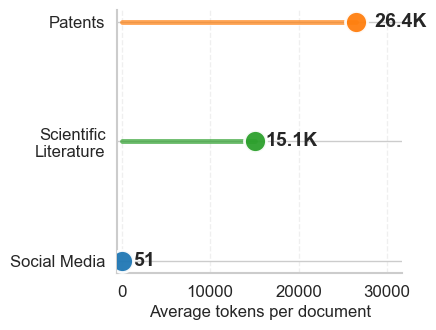

In [107]:
# ============================================================================
# PLOT 3: Average Document Length (Lollipop Chart)
# ============================================================================
fig3, ax3 = plt.subplots(figsize=(4.5, 3.5))

# Sort by avg tokens
sorted_idx = np.argsort(avg_tokens)
datasets_sorted = [datasets[i] for i in sorted_idx]
avg_tokens_sorted = [avg_tokens[i] for i in sorted_idx]
colors_sorted = [colors[i] for i in sorted_idx]

y_pos3 = np.arange(len(datasets_sorted))

# Create lollipop chart - thicker lines and larger markers
for i, (y, x, color) in enumerate(zip(y_pos3, avg_tokens_sorted, colors_sorted)):
    ax3.plot([0, x], [y, y], color=color, linewidth=3.5, alpha=0.7,
             solid_capstyle='round')

    # Creates the lollipop head
    ax3.scatter(x, y, s=250, color=color, alpha=0.95,
                edgecolor='white', linewidth=2, zorder=3)
    # Add labels - larger
    if x > 1000:
        label = f'{x/1000:.1f}K'
        x_initial = x
    else:
        label = f'{x:.0f}'
        x_initial = x + 1200

    ax3.text(x_initial * 1.08, y, label, va='center', ha='left',
             fontsize=14,
             fontweight='bold'
             )


## Log the x axis
ax3.set_yticks(y_pos3)
ax3.set_yticklabels(datasets_sorted, fontsize=12,
                    # fontweight='bold'
                    )
ax3.set_xlabel('Average tokens per document', fontsize=12,
               # fontweight='bold'
               )
# ax3.set_title('(c) Document Length', fontsize=12, fontweight='bold', pad=12, loc='left')
ax3.set_title('', fontsize=12,
              # fontweight='bold',
              pad=12, loc='left')

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.spines['left'].set_linewidth(1.5)
ax3.spines['bottom'].set_linewidth(1.5)
ax3.grid(axis='x', alpha=0.3, linestyle='--', linewidth=1)
ax3.set_axisbelow(True)
ax3.set_xlim(-500, max(avg_tokens_sorted) * 1.2)
ax3.tick_params(width=1.5, length=5)

plt.tight_layout()
plt.savefig('avg_document_length.pdf', bbox_inches='tight',
            # facecolor='white'
            )

plt.show()
plt.close()


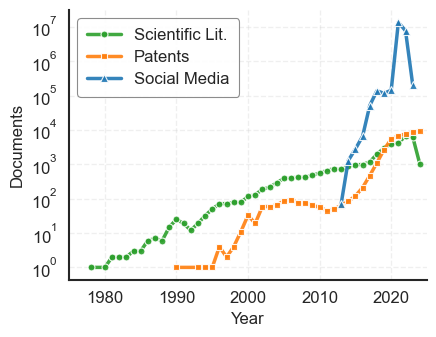

In [196]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Set style for academic publications - optimized for small scale
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.5

# Color palette - original
# colors = ['#F18F01', '#A23B72', '#2E86AB']  # Social Media, Patents, Scientific

# Get seaborn's default color palette
colors = sns.color_palette("tab10", 3)

# Data
patents_data = [{'year': '1990', 'count': 1}, {'year': '1993', 'count': 1}, {'year': '1994', 'count': 1}, {'year': '1995', 'count': 1}, {'year': '1996', 'count': 4}, {'year': '1997', 'count': 2}, {'year': '1998', 'count': 4}, {'year': '1999', 'count': 11}, {'year': '2000', 'count': 33}, {'year': '2001', 'count': 19}, {'year': '2002', 'count': 59}, {'year': '2003', 'count': 59}, {'year': '2004', 'count': 66}, {'year': '2005', 'count': 85}, {'year': '2006', 'count': 94}, {'year': '2007', 'count': 76}, {'year': '2008', 'count': 75}, {'year': '2009', 'count': 64}, {'year': '2010', 'count': 56}, {'year': '2011', 'count': 45}, {'year': '2012', 'count': 50}, {'year': '2013', 'count': 63}, {'year': '2014', 'count': 84}, {'year': '2015', 'count': 120}, {'year': '2016', 'count': 210}, {'year': '2017', 'count': 470}, {'year': '2018', 'count': 1103}, {'year': '2019', 'count': 2680}, {'year': '2020', 'count': 5460}, {'year': '2021', 'count': 6659}, {'year': '2022', 'count': 7747}, {'year': '2023', 'count': 8706}, {'year': '2024', 'count': 9029}]

scientific_data = [{'year': 1978.0, 'count': 1}, {'year': 1980.0, 'count': 1}, {'year': 1981.0, 'count': 2}, {'year': 1982.0, 'count': 2}, {'year': 1983.0, 'count': 2}, {'year': 1984.0, 'count': 3}, {'year': 1985.0, 'count': 3}, {'year': 1986.0, 'count': 6}, {'year': 1987.0, 'count': 7}, {'year': 1988.0, 'count': 6}, {'year': 1989.0, 'count': 15}, {'year': 1990.0, 'count': 25}, {'year': 1991.0, 'count': 19}, {'year': 1992.0, 'count': 12}, {'year': 1993.0, 'count': 19}, {'year': 1994.0, 'count': 32}, {'year': 1995.0, 'count': 50}, {'year': 1996.0, 'count': 71}, {'year': 1997.0, 'count': 72}, {'year': 1998.0, 'count': 78}, {'year': 1999.0, 'count': 78}, {'year': 2000.0, 'count': 116}, {'year': 2001.0, 'count': 130}, {'year': 2002.0, 'count': 188}, {'year': 2003.0, 'count': 213}, {'year': 2004.0, 'count': 290}, {'year': 2005.0, 'count': 389}, {'year': 2006.0, 'count': 402}, {'year': 2007.0, 'count': 421}, {'year': 2008.0, 'count': 427}, {'year': 2009.0, 'count': 477}, {'year': 2010.0, 'count': 561}, {'year': 2011.0, 'count': 658}, {'year': 2012.0, 'count': 751}, {'year': 2013.0, 'count': 709}, {'year': 2014.0, 'count': 915}, {'year': 2015.0, 'count': 969}, {'year': 2016.0, 'count': 987}, {'year': 2017.0, 'count': 1173}, {'year': 2018.0, 'count': 1971}, {'year': 2019.0, 'count': 3000}, {'year': 2020.0, 'count': 3943}, {'year': 2021.0, 'count': 4314}, {'year': 2022.0, 'count': 6491}, {'year': 2023.0, 'count': 6358}, {'year': 2024.0, 'count': 1016}]

social_data = [{'year': '2013', 'count': 69}, {'year': '2014', 'count': 1282}, {'year': '2015', 'count': 2802}, {'year': '2016', 'count': 6531}, {'year': '2017', 'count': 51105}, {'year': '2018', 'count': 138422}, {'year': '2019', 'count': 116428}, {'year': '2020', 'count': 143855}, {'year': '2021', 'count': 13654861}, {'year': '2022', 'count': 7707559}, {'year': '2023', 'count': 210176}]

# Convert to DataFrames
df_patents = pd.DataFrame(patents_data)
df_patents['year'] = df_patents['year'].astype(int)

df_scientific = pd.DataFrame(scientific_data)
df_scientific['year'] = df_scientific['year'].astype(int)

df_social = pd.DataFrame(social_data)
df_social['year'] = df_social['year'].astype(int)


# # Filter only 2024 data for all datasets
# df_patents = df_patents[df_patents['year'] <= 2023]
# df_scientific = df_scientific[df_scientific['year'] <= 2023]
# df_social = df_social[df_social['year'] <= 2023]

# ============================================================================
# PLOT 4: Temporal Evolution (Log Scale)
# ============================================================================
fig4, ax4 = plt.subplots(figsize=(4.5, 3.5))

# Plot each dataset with thicker lines and markers
ax4.plot(df_scientific['year'], df_scientific['count'],
         color=colors[2], linewidth=2.5, marker='o', markersize=5,
         label='Scientific Lit.', alpha=0.9, markeredgecolor='white',
         markeredgewidth=0.8)

ax4.plot(df_patents['year'], df_patents['count'],
         color=colors[1], linewidth=2.5, marker='s', markersize=5,
         label='Patents', alpha=0.9, markeredgecolor='white',
         markeredgewidth=0.8)

ax4.plot(df_social['year'], df_social['count'],
         color=colors[0], linewidth=2.5, marker='^', markersize=6,
         label='Social Media', alpha=0.9, markeredgecolor='white',
         markeredgewidth=0.8)

# Set log scale
ax4.set_yscale('log')

# Labels and title
ax4.set_xlabel('Year', fontsize=12,
               # fontweight='bold'
               )
ax4.set_ylabel('Documents', fontsize=12,
               # fontweight='bold'
               )
ax4.set_title('', fontsize=12,
              # fontweight='bold',
              pad=12, loc='left')

# Legend
ax4.legend(loc='upper left', frameon=True, fancybox=True,
           shadow=False, fontsize=12, framealpha=0.9,
           edgecolor='gray', borderpad=0.6, labelspacing=0.4)

# Styling
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.spines['left'].set_linewidth(1.5)
ax4.spines['bottom'].set_linewidth(1.5)
ax4.grid(alpha=0.3, linestyle='--', linewidth=1)
ax4.set_axisbelow(True)
ax4.tick_params(width=1.5, length=5, labelsize=12)

# Set x-axis limits to show full range
ax4.set_xlim(1975, 2025)

plt.tight_layout()
plt.savefig('temporal_evolution.pdf', bbox_inches='tight',
            # facecolor='white'
            dpi=300)
plt.show()
plt.close()

/var/folders/bv/5jlkj1ls21bgn85z2xqqv13c0000gn/T/ipykernel_89819/135946654.py:115: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax5_market.set_ylim(0, df_market['market_cap'].max() * 1.1)


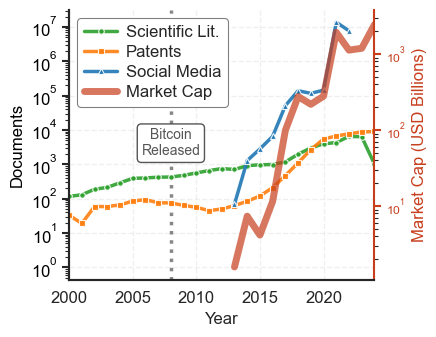

In [208]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.patches import Rectangle

# Set style for academic publications - optimized for small scale
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.5

# Get seaborn's default color palette
colors = sns.color_palette("tab10", 3)
market_color = '#C73E1D'  # Red/orange for market cap

market_cap_data = [{'year': 2013, 'market_cap': 1.582489464}, {'year': 2014, 'market_cap': 7.3675975685}, {'year': 2015, 'market_cap': 4.155374921644521}, {'year': 2016, 'market_cap': 11.556311140148864}, {'year': 2017, 'market_cap': 99.14009432528798}, {'year': 2018, 'market_cap': 276.2620426132273}, {'year': 2019, 'market_cap': 218.1713293336849}, {'year': 2020, 'market_cap': 279.2041636383777}, {'year': 2021, 'market_cap': 1931.4128126413036}, {'year': 2022, 'market_cap': 1125.2007077254812}, {'year': 2023, 'market_cap': 1190.4747082768013}, {'year': 2024, 'market_cap': 2433.0152163794373}, {'year': 2025, 'market_cap': 3450.658242625493}]

# Convert to DataFrames
df_patents = pd.DataFrame(patents_data)
df_patents['year'] = df_patents['year'].astype(int)

df_scientific = pd.DataFrame(scientific_data)
df_scientific['year'] = df_scientific['year'].astype(int)

df_social = pd.DataFrame(social_data)
df_social['year'] = df_social['year'].astype(int)

df_market = pd.DataFrame(market_cap_data)

# Filter only to 2023 for documents
df_patents = df_patents[df_patents['year'] <= 2024]
df_scientific = df_scientific[df_scientific['year'] <= 2024]
df_social = df_social[df_social['year'] <= 2022]

# ============================================================================
# PLOT 5: Temporal Evolution with Market Capitalization
# ============================================================================
fig5, ax5 = plt.subplots(figsize=(4.5, 3.5))

# Create secondary y-axis for market cap
ax5_market = ax5.twinx()

# Plot document counts on primary axis (log scale)
line1 = ax5.plot(df_scientific['year'], df_scientific['count'],
                 color=colors[2], linewidth=2.5, marker='o', markersize=4,
                 label='Scientific Lit.', alpha=0.9, markeredgecolor='white',
                 markeredgewidth=0.8,
                 zorder=3
                 )

line2 = ax5.plot(df_patents['year'], df_patents['count'],
                 color=colors[1], linewidth=2.5, marker='s', markersize=4,
                 label='Patents', alpha=0.9, markeredgecolor='white',
                 markeredgewidth=0.8,
                 zorder=3
                 )

line3 = ax5.plot(df_social['year'], df_social['count'],
                 color=colors[0], linewidth=2.5, marker='^', markersize=5,
                 label='Social Media', alpha=0.9, markeredgecolor='white',
                 markeredgewidth=0.8,
                 zorder=3
                 )

# Plot market cap on secondary axis
line4 = ax5_market.plot(df_market['year'], df_market['market_cap'],
                        color=market_color,
                        linewidth=5,
                        # marker='D',
                        # markersize=5,
                        label='Market Cap', alpha=0.70, markeredgecolor='white',
                        markeredgewidth=0.7,
                        # linestyle='--',
                        zorder=3
                        )

# Logged market cap
ax5_market.set_yscale('log')


# Set log scale for documents
ax5.set_yscale('log')

# Labels and title
ax5.set_xlabel('Year', fontsize=12,
               # fontweight='bold'
               )
ax5.set_ylabel('Documents', fontsize=12,
               # fontweight='bold',
               color='black')
ax5_market.set_ylabel('Market Cap (USD Billions)', fontsize=12,
                      # fontweight='bold',
                      color=market_color)
# ax5.set_title('(e) Documents & Market Growth', fontsize=12, fontweight='bold', pad=12, loc='left')
ax5.set_title('', fontsize=12, fontweight='bold', pad=12, loc='left')


# Styling for primary axis
ax5.spines['top'].set_visible(False)
ax5.spines['left'].set_linewidth(1.5)
ax5.spines['bottom'].set_linewidth(1.5)
ax5.spines['right'].set_visible(False)
ax5.grid(alpha=0.3, linestyle='--', linewidth=1, zorder=0)
# ax5.set_axisbelow(True)
ax5.tick_params(axis='y', width=1.5, length=5, labelcolor='black', labelsize=12)
ax5.tick_params(axis='x', width=1.5, length=5, labelsize=12)

# Styling for secondary axis
ax5_market.spines['top'].set_visible(False)
ax5_market.spines['right'].set_linewidth(1.5)
ax5_market.spines['right'].set_color(market_color)
ax5_market.tick_params(axis='y', width=1.5, length=5, labelcolor=market_color,
                       color=market_color)
ax5_market.set_ylim(0, df_market['market_cap'].max() * 1.1)

# Set x-axis limits
ax5.set_xlim(2000, 2024)

# Add Bitcoin release vertical line
bitcoin_line = ax5.axvline(x=2008, color='#555555', linestyle=':', linewidth=2.5,
                            alpha=0.7, zorder=1)

# Add annotation for Bitcoin
plt.text(2008, 0.45, 'Bitcoin\nReleased',
         transform=ax5.get_xaxis_transform(),
         ha='center', va='bottom', fontsize=10,
         # fontweight='bold',
         color='#555555',
         bbox=dict(boxstyle='round,pad=0.3', facecolor='white',
                   edgecolor='#555555', alpha=1, linewidth=1))

# Combine legends
lines = line1 + line2 + line3 + line4
labels = [l.get_label() for l in lines]
plt.legend(lines, labels, loc='upper left', frameon=True, fancybox=True,
           shadow=False, fontsize=12, framealpha=1,
           edgecolor='gray', borderpad=0.4, labelspacing=0.3,
           handlelength=2, handletextpad=0.5)

plt.tight_layout()
plt.savefig('temporal_market.pdf', bbox_inches='tight', facecolor='white')

plt.show()
plt.close()



/var/folders/bv/5jlkj1ls21bgn85z2xqqv13c0000gn/T/ipykernel_89819/3240019652.py:205: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax6_market.set_ylim(0, df_market['market_cap'].max() * 1.1)


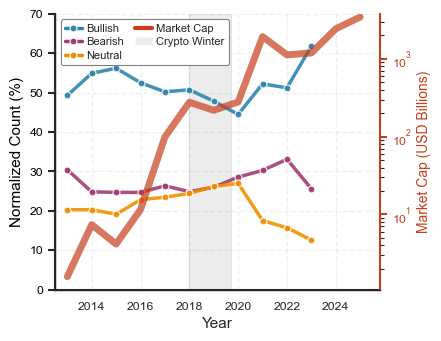

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib.ticker import MaxNLocator
from matplotlib.patches import Patch

# Set style for academic publications - optimized for small scale
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Helvetica', 'DejaVu Sans']
plt.rcParams['font.size'] = 11
plt.rcParams['axes.linewidth'] = 1.5

sns.set_theme(style="white", context="paper")

# Sentiment data
sentiment_data = [
    {'year': 2013, 'sentiment_label': 'bullish', 'count': 49.275362318840585},
    {'year': 2013, 'sentiment_label': 'bearish', 'count': 30.434782608695656},
    {'year': 2013, 'sentiment_label': 'neutral', 'count': 20.28985507246377},
    {'year': 2014, 'sentiment_label': 'bullish', 'count': 54.91419656786272},
    {'year': 2014, 'sentiment_label': 'bearish', 'count': 24.804992199687987},
    {'year': 2014, 'sentiment_label': 'neutral', 'count': 20.2808112324493},
    {'year': 2015, 'sentiment_label': 'bullish', 'count': 56.174161313347604},
    {'year': 2015, 'sentiment_label': 'bearish', 'count': 24.696645253390432},
    {'year': 2015, 'sentiment_label': 'neutral', 'count': 19.129193433261957},
    {'year': 2016, 'sentiment_label': 'bullish', 'count': 52.50344510794671},
    {'year': 2016, 'sentiment_label': 'bearish', 'count': 24.66697289848415},
    {'year': 2016, 'sentiment_label': 'neutral', 'count': 22.829581993569132},
    {'year': 2017, 'sentiment_label': 'bullish', 'count': 50.20056745915272},
    {'year': 2017, 'sentiment_label': 'bearish', 'count': 26.349672243420407},
    {'year': 2017, 'sentiment_label': 'neutral', 'count': 23.449760297426867},
    {'year': 2018, 'sentiment_label': 'bullish', 'count': 50.720983658666974},
    {'year': 2018, 'sentiment_label': 'bearish', 'count': 24.86671193885365},
    {'year': 2018, 'sentiment_label': 'neutral', 'count': 24.412304402479375},
    {'year': 2019, 'sentiment_label': 'bullish', 'count': 47.82955989968049},
    {'year': 2019, 'sentiment_label': 'neutral', 'count': 26.183564091112103},
    {'year': 2019, 'sentiment_label': 'bearish', 'count': 25.986876009207403},
    {'year': 2020, 'sentiment_label': 'bullish', 'count': 44.45379027492962},
    {'year': 2020, 'sentiment_label': 'bearish', 'count': 28.567654930311768},
    {'year': 2020, 'sentiment_label': 'neutral', 'count': 26.978554794758615},
    {'year': 2021, 'sentiment_label': 'bullish', 'count': 52.22512334618419},
    {'year': 2021, 'sentiment_label': 'bearish', 'count': 30.24815118952877},
    {'year': 2021, 'sentiment_label': 'neutral', 'count': 17.52672546428704},
    {'year': 2022, 'sentiment_label': 'bullish', 'count': 51.209637188635206},
    {'year': 2022, 'sentiment_label': 'bearish', 'count': 33.09086573323668},
    {'year': 2022, 'sentiment_label': 'neutral', 'count': 15.699497078128108},
    {'year': 2023, 'sentiment_label': 'bullish', 'count': 61.796779841656516},
    {'year': 2023, 'sentiment_label': 'bearish', 'count': 25.5966428136419},
    {'year': 2023, 'sentiment_label': 'neutral', 'count': 12.606577344701583}
]

sentiment_scores = pd.DataFrame(sentiment_data)

# Market cap data
df_market = pd.DataFrame(market_cap_data)

# Filter out years not in sentiment data
# df_market = df_market[df_market['year'].isin(sentiment_scores['year'].unique())]

market_color = '#C73E1D'  # Red/orange for market cap

# ============================================================================
# PLOT 6: Sentiment Analysis with Market Cap and Crypto Winter Marker
# ============================================================================
fig6, ax6 = plt.subplots(figsize=(4.5, 3.5))

# Create secondary y-axis for market cap
ax6_market = ax6.twinx()

# Define colors for sentiment (matching your original palette)
sentiment_colors = {
    'bullish': '#2E86AB',   # Blue
    'bearish': '#A23B72',   # Purple/Magenta
    'neutral': '#F18F01'    # Orange
}

# Plot sentiment lines on primary axis
for sentiment in ['bullish', 'bearish', 'neutral']:
    sentiment_data = sentiment_scores[sentiment_scores['sentiment_label'] == sentiment]
    ax6.plot(sentiment_data['year'], sentiment_data['count'],
             color=sentiment_colors[sentiment],
             linewidth=2.5,
             marker='o',
             markersize=5,
             label=sentiment.capitalize(),
             alpha=0.9,
             markeredgecolor='white',
             markeredgewidth=0.8,
             zorder=3)

# Plot market cap on secondary axis
market_line = ax6_market.plot(df_market['year'], df_market['market_cap'],
                               color=market_color,
                               linewidth=5,
                               # marker='D',
                               markersize=5,
                               label='Market Cap',
                               alpha=0.7,
                               markeredgecolor='white',
                               markeredgewidth=0.8,
                               # linestyle='--',
                               zorder=2)

# Log scale for market cap
ax6_market.set_yscale('log')


# Add crypto winter shaded region (2018)
crypto_winter = ax6.axvspan(2018, 2019.7,
                            alpha=0.15,
                            color='gray',
                            zorder=1)

# # Add annotation for crypto winter
# y_max = sentiment_scores['count'].max()
# ax6.text(2019, y_max * 0.98, 'Crypto\nWinter',
#          ha='center', va='top',
#          fontsize=8,
#          fontweight='bold',
#          color='#555555',
#          bbox=dict(boxstyle='round,pad=0.4',
#                    facecolor='white',
#                    edgecolor='gray',
#                    alpha=1.0,
#                    linewidth=1.2))

# Labels and title
ax6.set_xlabel('Year', fontsize=11,
               # fontweight='bold'
               )
ax6.set_ylabel('Normalized Count (%)', fontsize=11,
               # fontweight='bold',
               color='black')
ax6_market.set_ylabel('Market Cap (USD Billions)', fontsize=10,
                      # fontweight='bold',
                      color='#C73E1D')
# ax6.set_title('(f) Sentiment & Market', fontsize=12, fontweight='bold', pad=12, loc='left')
ax6.set_title('', fontsize=12, fontweight='bold', pad=12, loc='left')


# Create combined legend
# Get sentiment handles
sentiment_handles = []
for sentiment in ['bullish', 'bearish', 'neutral']:
    sentiment_handles.append(plt.Line2D([0], [0],
                                        color=sentiment_colors[sentiment],
                                        linewidth=2.5,
                                        marker='o',
                                        markersize=5,
                                        markeredgecolor='white',
                                        markeredgewidth=0.8,
                                        label=sentiment.capitalize()))

# Get market cap handle
market_handle = [plt.Line2D([0], [0],
                            color='#C73E1D',
                            linewidth=3,
                            # linestyle='--',
                            # marker='D',
                            markersize=5,
                            markeredgecolor='white',
                            markeredgewidth=0.7,
                            label='Market Cap')]

# Get crypto winter handle
crypto_handle = [Patch(facecolor='gray', alpha=0.15, label='Crypto Winter')]

# Combine all handles
all_handles = sentiment_handles + market_handle + crypto_handle

# Create legend
legend = ax6.legend(handles=all_handles,
                    loc='upper left',
                    ncol=2,
                    frameon=True,
                    fancybox=True,
                    shadow=False,
                    fontsize=8,
                    framealpha=1.0,
                    edgecolor='gray',
                    borderpad=0.4,
                    labelspacing=0.3,
                    columnspacing=1.0,
                    handlelength=1.5,
                    handletextpad=0.4)
legend.set_zorder(100)

# Styling for primary axis
ax6.spines['top'].set_visible(False)
ax6.spines['left'].set_linewidth(1.5)
ax6.spines['bottom'].set_linewidth(1.5)
ax6.spines['right'].set_visible(False)
ax6.grid(alpha=0.3, linestyle='--', linewidth=1, zorder=0)
ax6.set_axisbelow(True)
ax6.tick_params(axis='y', width=1.5, length=5, labelcolor='black')
ax6.tick_params(axis='x', width=1.5, length=5)

# Styling for secondary axis
ax6_market.spines['top'].set_visible(False)
ax6_market.spines['right'].set_linewidth(1.5)
ax6_market.spines['right'].set_color('#C73E1D')
ax6_market.tick_params(axis='y', width=1.5, length=5, labelcolor='#C73E1D',
                       color='#C73E1D')
ax6_market.set_ylim(0, df_market['market_cap'].max() * 1.1)

# Format x-axis to show integers only
ax6.xaxis.set_major_locator(MaxNLocator(integer=True))

# Set x-axis limits
ax6.set_xlim(2012.5, 2025.8)

# Set y-axis limits for better visualization
ax6.set_ylim(0, 70)

plt.tight_layout()
plt.savefig('sentiment_market.pdf', bbox_inches='tight',
            # facecolor='white',
            dpi=300)
plt.show()
plt.close()